In [1]:
import sys
sys.path.append('../')

from data1.dataset import *
from model.kan.kan import *
import torch
import math

(tensor([[-0.8989,  0.2452],
        [-0.3887,  0.7383],
        [-0.1075,  0.3620],
        ...,
        [ 0.5059,  0.1592],
        [ 0.6256, -0.0240],
        [-0.9292, -0.1507]]), tensor([0.7771, 0.6741, 0.8184,  ..., 2.7876, 2.5185, 0.8204]))


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

loss: 0.20522727072238922: 100%|████████████████████████████████████| 50/50 [00:42<00:00,  1.18it/s]


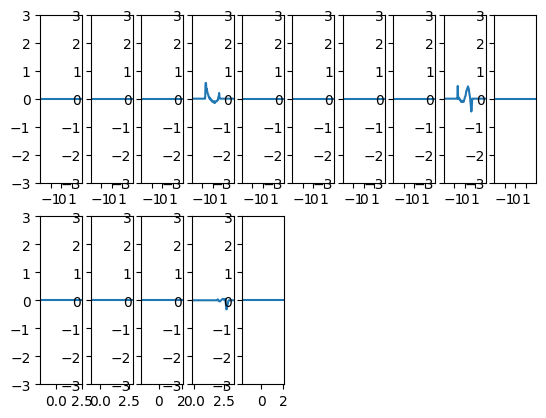

#-------------------Evaluate-------------------#
train_loss: 0.20522727072238922 test_loss: 0.2538885176181793


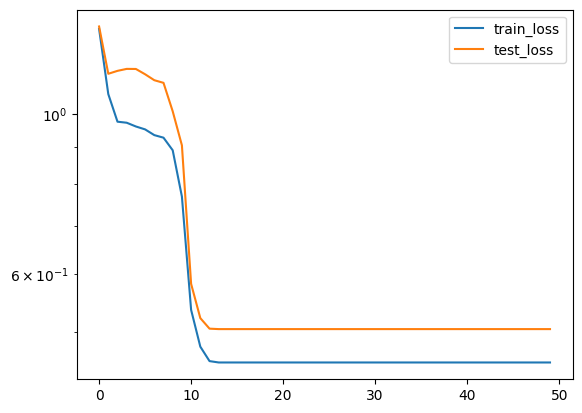

In [14]:
first = 1
old_model = None
learning_rate = 5e-2
train_plot = []
test_plot = []

train_data = {}
train_data[0] = train_dataloader.dataset[:][0]
train_data[1] = train_dataloader.dataset[:][1]
test_data = {}
test_data[0] = test_dataloader.dataset[:][0]
test_data[1] = test_dataloader.dataset[:][1]

model = KAN(G = 100, k = 3, width = [2, 5, 1])

#optim = torch.optim.Adam(new_model.parameters(), lr = learning_rate)
optim = torch.optim.LBFGS(model.parameters(), lr = learning_rate, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32)
loss_func = torch.nn.MSELoss()
train_loss_list, test_loss_list = model.train_model(train_data, test_data, optimizer = optim, loss_func=loss_func, epochs=50, stop_grid=5, is_LBFGS = True,
                                                    lamb=0.08, lamb_l1=1, lamb_entropy=10, lamb_l1_coef=0.1, lamb_l1_coef_diff=0.0
                                                    )

train_plot += [math.sqrt(loss) for loss in train_loss_list]
test_plot += [math.sqrt(loss) for loss in test_loss_list]

model.plot()

print("#-------------------Evaluate-------------------#")
print(f"train_loss: {train_loss_list[-1]} test_loss: {test_loss_list[-1]}")
    
plt.plot([i for i in range(len(train_plot))], train_plot, label="train_loss")
plt.plot([i for i in range(len(test_plot))], test_plot, label="test_loss")
plt.yscale('log', base=10)
plt.legend()
plt.show()